- **Name:** Jessica P. Apuyan
- **Term:** AY 2024-2025

# Laboratory Experiment 003: Linear Applications of Op-Amps
This notebook demonstrates the working of summing amplifiers, integrators, and differentiators using Python simulations.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.signal import lfilter

## Summing Amplifier Simulation
A summing amplifier produces an output equal to the weighted sum of multiple input signals. This is commonly used in audio mixers, DACs, and signal processing.

In [4]:
def summing_amplifier(v1, v2, r1, r2, rf):
    """ Implements a summing amplifier using OpAmps """
    return -(rf / r1) * np.array(v1) - (rf / r2) * np.array(v2)  # Ensure array conversion


## Integrator Simulation
An integrator circuit produces an output proportional to the integral of the input signal, useful for waveform generation and signal processing.

In [5]:
def integrator(input_signal, time, r, c):
    """ Implements an integrator circuit """
    return -cumulative_trapezoid(input_signal, time, initial=0) / (r * c)  # More accurate integration


## Differentiator Simulation
A differentiator circuit produces an output proportional to the rate of change of the input signal, used in edge detection and high-frequency signal processing.

In [6]:
def differentiator(input_signal, time, r, c):
    """ Implements a differentiator circuit with robust zero-division protection """
    
    # Ensure time values are unique and strictly increasing
    time, unique_indices = np.unique(time, return_index=True)
    input_signal = input_signal[unique_indices]  # Keep signal consistent with unique time values
    
    # Compute time differences
    dt = np.diff(time)
    
    # Prevent division by zero (replace very small values with a small epsilon)
    dt[dt < 1e-9] = 1e-9
    
    # Compute derivative manually using np.diff()
    diff_signal = np.diff(input_signal) / dt  # First derivative
    
    # Maintain original signal length (pad with first value to match array size)
    diff_signal = np.insert(diff_signal, 0, diff_signal[0])
    
    return -r * c * diff_signal  # Apply differentiator scaling


In [9]:
# Define parameters
time = np.linspace(0, 1, 1000)
input_signal = np.sin(2 * np.pi * 5 * time)
r1, r2, rf, r, c = 10e3, 10e3, 20e3, 10e3, 1e-6

# Compute outputs
summing_output = summing_amplifier(input_signal, input_signal/2, r1, r2, rf)
integrator_output = integrator(input_signal, time, r, c)
differentiator_output = differentiator(input_signal, time, r, c)


## Visualization
The following plots show the outputs of the summing amplifier, integrator, and differentiator.

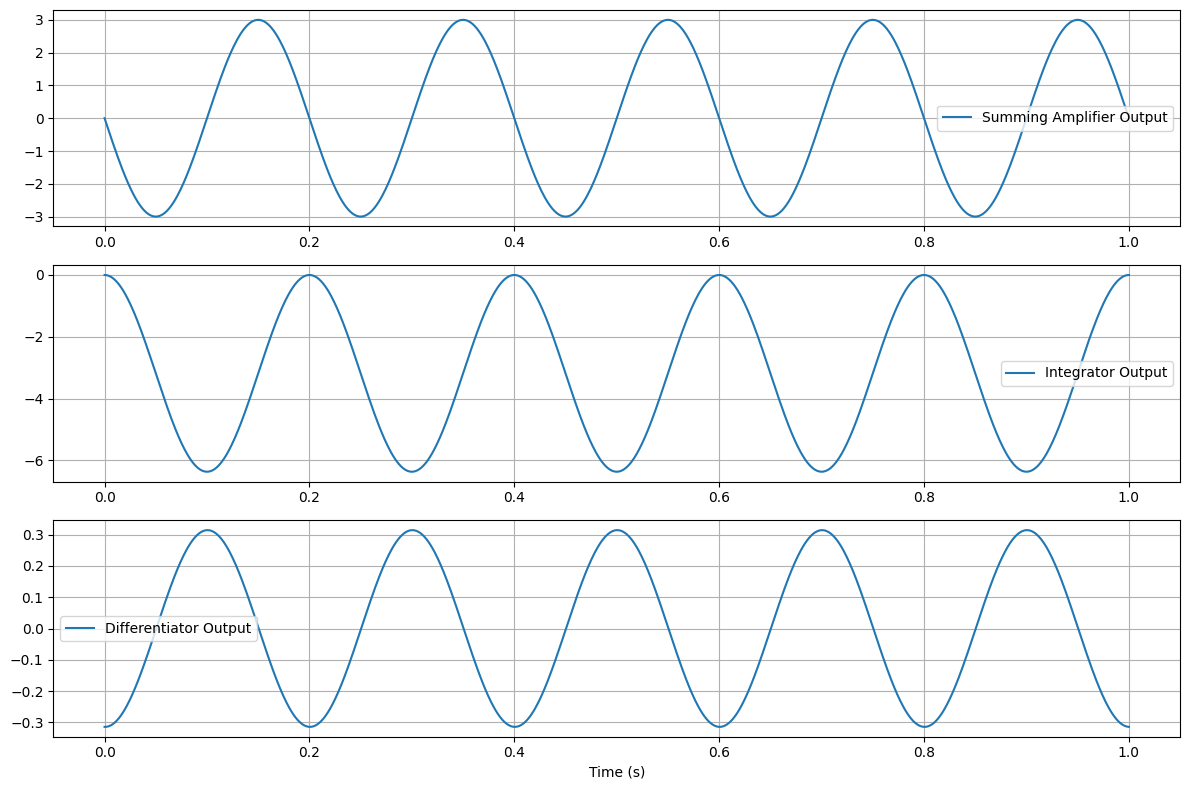

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, summing_output, label='Summing Amplifier Output')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, integrator_output, label='Integrator Output')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, differentiator_output, label='Differentiator Output')
plt.legend()
plt.grid()

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()